# 15CSE481 - Machine Learning And Data Mining Lab
## Case study - Group 17 
Parripati Divyasri - `CB.EN.U4CSE18041`

Harish K - `CB.EN.U4CSE18501`


## Dry Beans Classification


In [1]:
!pip install squarify

In [2]:
#importing necessary modules
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

In [3]:
#Uploading csv file
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean.csv to Dry_Bean.csv


In [3]:
#Loading the dataset
data = pd.read_csv('Dry_Bean.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,NaN,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
print("Number of instances in the dataset:\t{}".format(data.shape[0]))
print("Number of features in the dataset :\t{}".format(data.shape[1]))

Number of instances in the dataset:	13611
Number of features in the dataset :	17


In [5]:
list(data.columns)

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

# Exploratory Data Analysis

In [6]:
# About data
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13609.000000,13607.000000,13602.000000,13607.000000,13605.000000,13607.000000,13609.000000,13609.000000,13610.000000,13605.000000,13605.000000,13608.000000,13608.000000,13609.000000,13609.000000
mean,53048.284549,855.302216,320.164140,202.281275,1.583358,0.750915,53773.304917,253.070061,0.749728,0.987143,0.873275,0.799836,0.006564,0.001716,0.643574,0.995063
std,29324.095717,214.299629,85.696444,44.982812,0.246622,0.091920,29777.787660,59.179500,0.049087,0.004661,0.059518,0.061702,0.001128,0.000596,0.098989,0.004367
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.557000,253.320436,175.825000,1.432362,0.715948,36717.000000,215.076884,0.718632,0.985670,0.832139,0.762438,0.005900,0.001153,0.581329,0.993703
50%,44652.000000,794.950000,296.908488,192.452036,1.551290,0.764446,45203.000000,238.456715,0.759847,0.988284,0.883137,0.801227,0.006645,0.001693,0.641991,0.996385
75%,61332.000000,977.222000,376.504333,217.043193,1.707245,0.810461,62305.000000,279.448745,0.786851,0.990013,0.916865,0.834235,0.007272,0.002170,0.696006,0.997881
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Feature Selection

### Correlation Heatmap

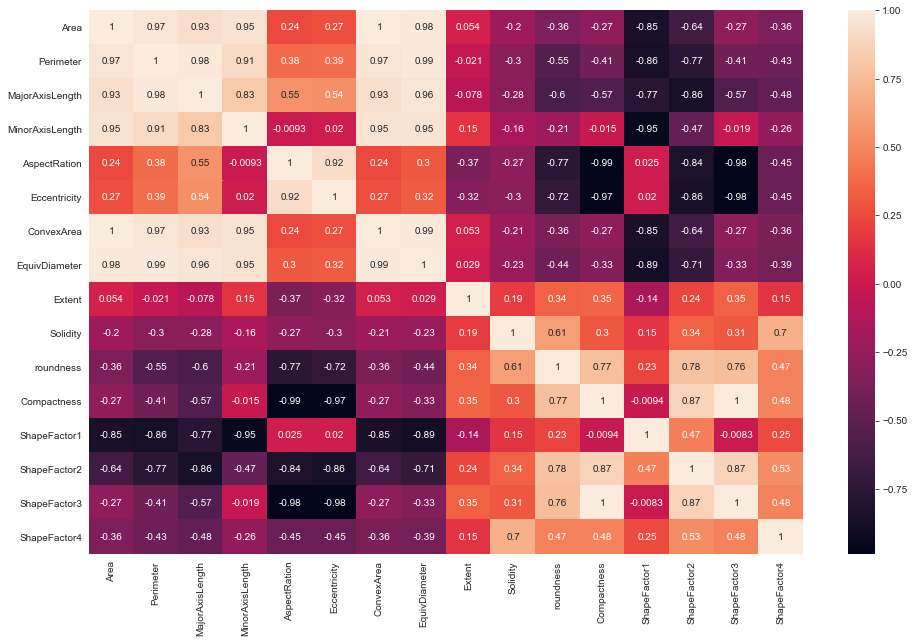

In [7]:
#Analysing heat map
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Multicollinearity (high inter-correlation between variables) exists between the features Area, ConvexArea and EquivDiameter

So, we drop two columns(ConvexArea, EquivDiameter) here

In [8]:
df = data.drop(labels=["ConvexArea", "EquivDiameter"], axis=1)

## Distribution Analysis

Here we will visualize the distribution of some of the important features of respective classes

#### SEKER 

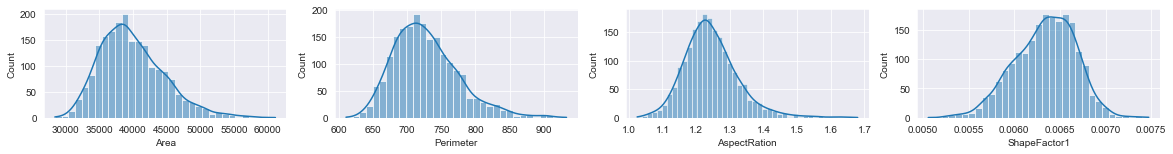

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='SEKER'], x='Area', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='SEKER'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='SEKER'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='SEKER'], x='ShapeFactor1', kde=True)
plt.show()

#### BARBUNYA 

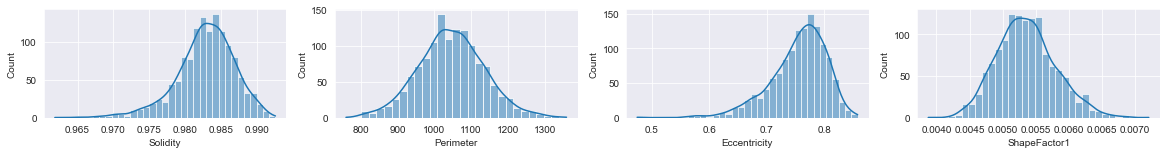

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='BARBUNYA'], x='Solidity', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='BARBUNYA'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='BARBUNYA'], x='Eccentricity', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='BARBUNYA'], x='ShapeFactor1', kde=True)
plt.show()

#### BOMBAY 

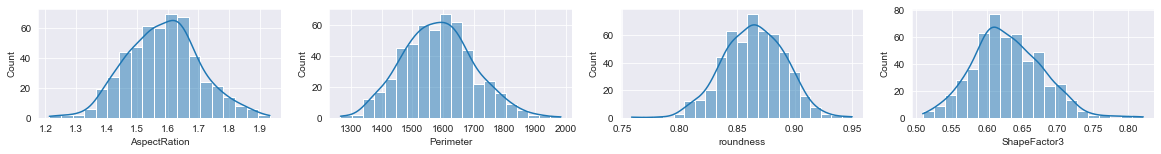

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='BOMBAY'], x='AspectRation', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='BOMBAY'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='BOMBAY'], x='roundness', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='BOMBAY'], x='ShapeFactor3', kde=True)
plt.show()

#### CALI 

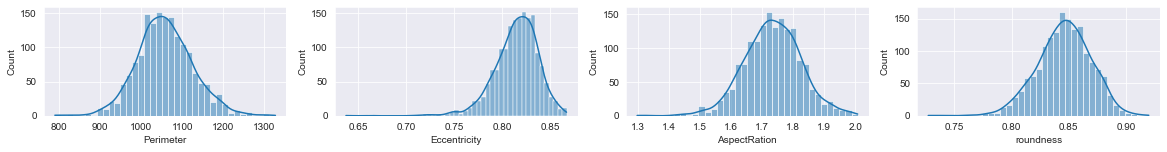

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='CALI'], x='Perimeter', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='CALI'], x='Eccentricity', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='CALI'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='CALI'], x='roundness', kde=True)
plt.show()

#### HOROZ CLASS

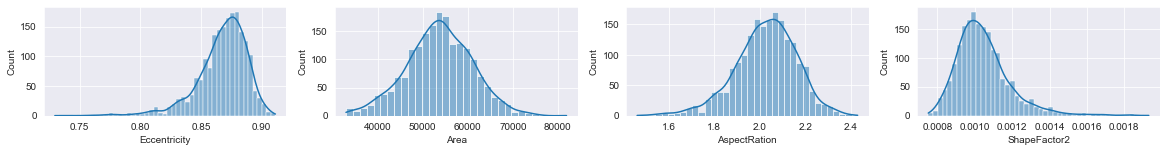

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='HOROZ'], x='Eccentricity', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='HOROZ'], x='Area', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='HOROZ'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='HOROZ'], x='ShapeFactor2', kde=True)
plt.show()

#### SIRA 

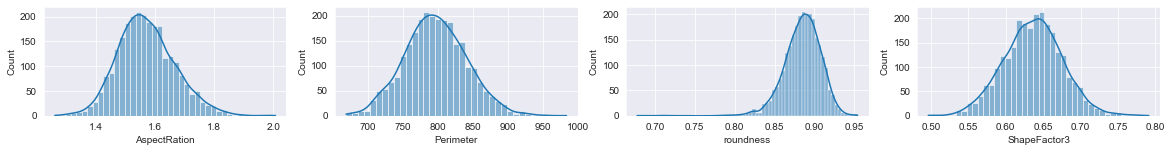

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='SIRA'], x='AspectRation', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='SIRA'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='SIRA'], x='roundness', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='SIRA'], x='ShapeFactor3', kde=True)
plt.show()

#### DERMASON 

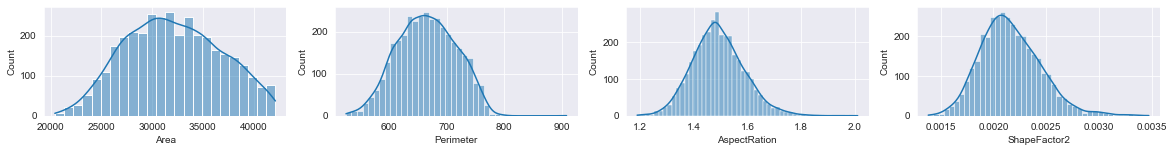

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='DERMASON'], x='Area', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='DERMASON'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='DERMASON'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='DERMASON'], x='ShapeFactor2', kde=True)
plt.show()

## Handling null values

In [16]:
df.isnull().sum()

Area               0
Perimeter          2
MajorAxisLength    4
MinorAxisLength    9
AspectRation       4
Eccentricity       6
Extent             2
Solidity           1
roundness          6
Compactness        6
ShapeFactor1       3
ShapeFactor2       3
ShapeFactor3       2
ShapeFactor4       2
Class              0
dtype: int64

From the distribution analysis, we can see that the data is skewed for most of thr features. Thus, we fill the null values with median.

In [17]:
df = df.fillna(df.median())

In [18]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## CountPlot

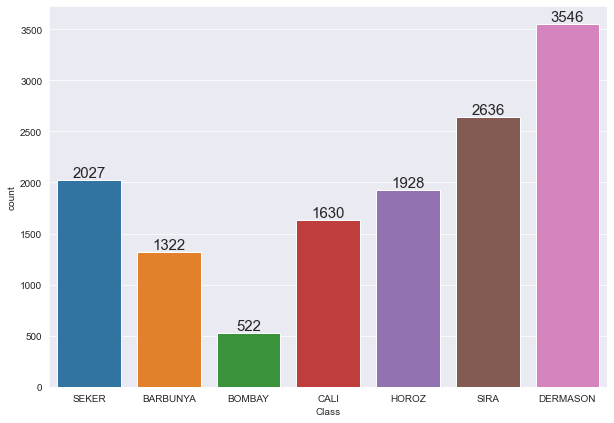

In [19]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['Class'])
for i in ax.patches:
  ax.annotate("{}".format(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom', size=15)
plt.show()

Here we can see that Dermason class has the most number of instances and Bombay class has the least number of instances

## Outlier Detection using Box Plot

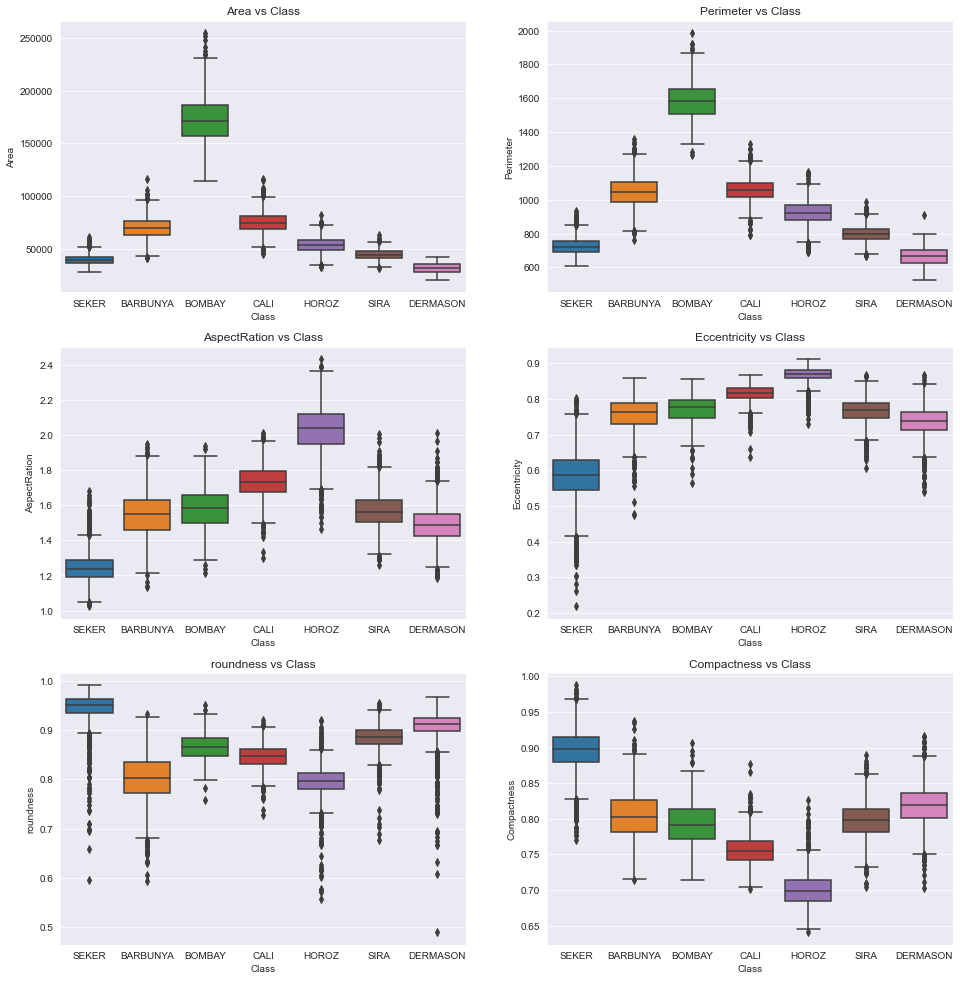

In [20]:
features = [["Area","Perimeter"],["AspectRation","Eccentricity"], ["roundness","Compactness"]]
fig, axs = plt.subplots(3, 2, figsize=(16, 17))

for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axs[i, j], x="Class",y=features[i][j],data=df)
        axs[i, j].set_title(features[i][j]+" vs Class")

The boxplot shows that all the features of each class contains outliers that needs to be handled

### Removing Outliers

In [21]:
classes = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
features = list(df.columns)[:-1]  #exclude last column

df_list = []
for cls in classes:
  df_t = df[df['Class'] == cls]
  for feature in features:
    q1 = np.percentile(df_t[feature], 25)
    q3 = np.percentile(df_t[feature], 75)
    iqr = q3 - q1
    cutoff = 1.5 * iqr
    df_t = df_t[(df_t[feature] > q1-cutoff) & (df_t[feature] < q3+cutoff)]
  df_list.append(df_t)

df = pd.concat(df_list) # changing the previous datafram with outliers to one witout outliers

	Boxplot after removing outliers



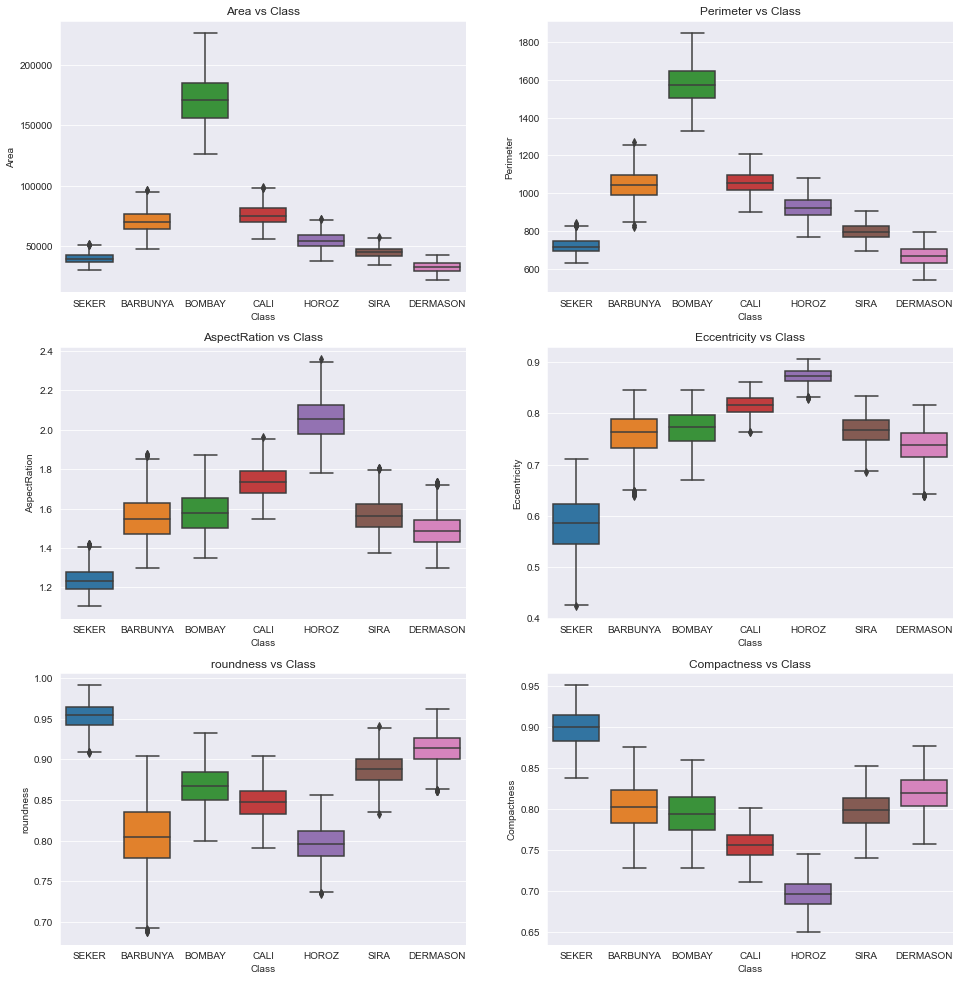

In [22]:
features = [["Area","Perimeter"],["AspectRation","Eccentricity"], ["roundness","Compactness"]]
fig, axs = plt.subplots(3, 2, figsize=(16, 17))
print("\tBoxplot after removing outliers\n")
for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axs[i, j], x="Class",y=features[i][j],data=df)
        axs[i, j].set_title(features[i][j]+" vs Class")

In [23]:
print("Number of instances in dataset after removing outliers:", df.shape[0])

Number of instances in dataset after removing outliers: 11645


1966 instances have been removed in the process of outlier removal

## Preparing the Data

### Splitting data into training and testing sets

Here we split 80% of the data for training and rest 20% for testing

In [24]:
dataAttributes = df.drop("Class",axis=1)
dataClasses = df[["Class"]]

x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)

### Normalization using Standard Scaler

The scale of the features could affect the learning model's accuracy. Thus there is a necessity to change the values of the features in the dataset to use a common scale. 

Here we achieve this using Standard Scaler


In [25]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

df = pd.DataFrame(x_train, columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4'])
df['Class'] = list(y_train["Class"])

In [26]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.246480,0.705599,0.819275,-0.088126,1.560763,1.226384,-2.798733,-0.311362,-2.221896,-1.480210,-0.067680,-1.186606,-1.434524,-1.465027,HOROZ
1,0.066613,0.433803,0.664292,-0.346144,1.764635,1.308886,-1.772936,-0.418848,-1.848869,-1.607613,0.271503,-1.164880,-1.546994,-0.466850,HOROZ
2,0.853946,1.033902,1.186889,0.784792,0.787270,0.838367,-1.653090,-0.904809,-0.495804,-0.864352,-1.031827,-1.141938,-0.873539,-1.078608,CALI
3,-0.089597,0.146201,0.475034,-0.520938,1.754345,1.304884,1.135458,0.115895,-1.187226,-1.600049,0.539521,-1.084345,-1.540350,-0.449604,HOROZ
4,-0.787549,-0.975507,-0.859778,-1.045646,0.011613,0.273616,-1.031923,0.523346,0.541034,-0.105359,1.471627,0.489083,-0.142698,0.963073,DERMASON


## Data Visualiztion

### Tree map

In [27]:
classCounts = list(df.groupby("Class")["Area"].count())

In [28]:
classes = sorted(set(df['Class']))

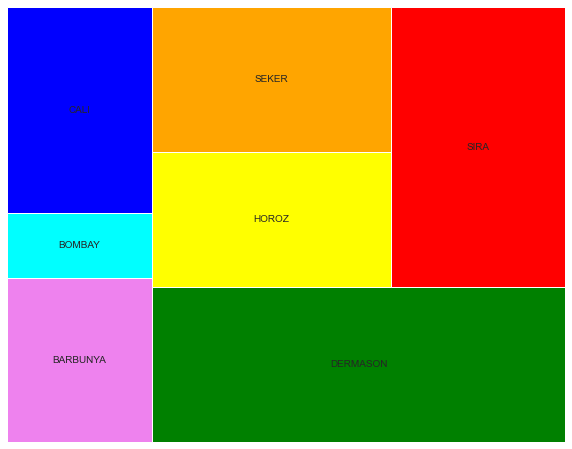

In [29]:
fig, ax = plt.subplots(1, figsize = (10,8))
squarify.plot(sizes=classCounts, label=classes, color=["violet", "cyan", "blue", "green", "yellow", "orange", "red"])
plt.axis('off')
plt.show()

### Parallel coordinates

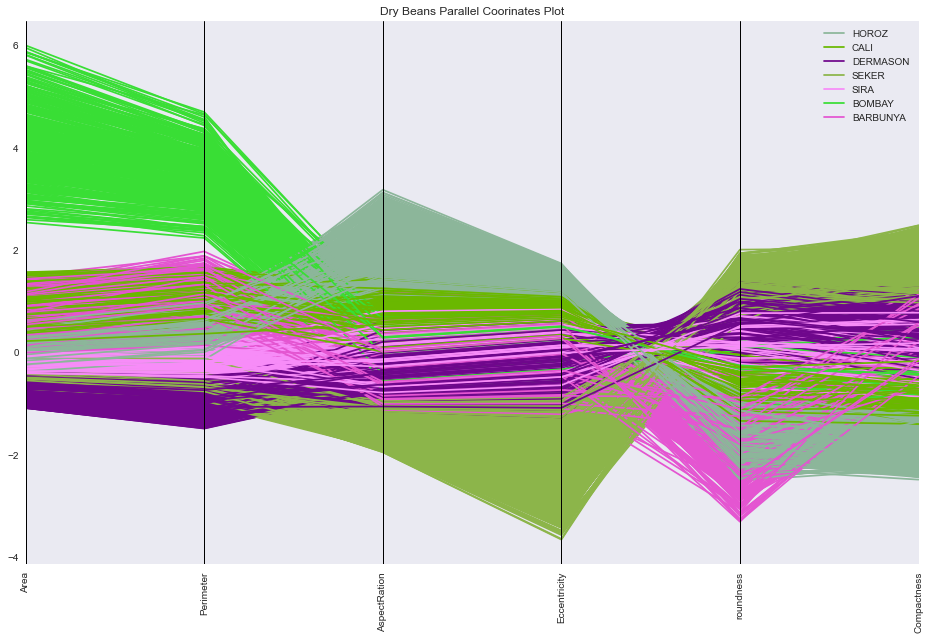

In [30]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(16,10))
    pd.plotting.parallel_coordinates(df[["Area","Perimeter","AspectRation","Eccentricity", "roundness","Compactness","Class"]], "Class")
    plt.xticks(rotation=90)
    plt.title("Dry Beans Parallel Coorinates Plot")

- The beans belonging to Bombay class has higher area and perimeter as compared to other classes
- The beans belonging to Horoz class has the highest AspectRation
- Seker class has the highest eccentricity
- Barbunya class has the lowest roundness
- Seker class has the highest compactness

### Scatter Matrix

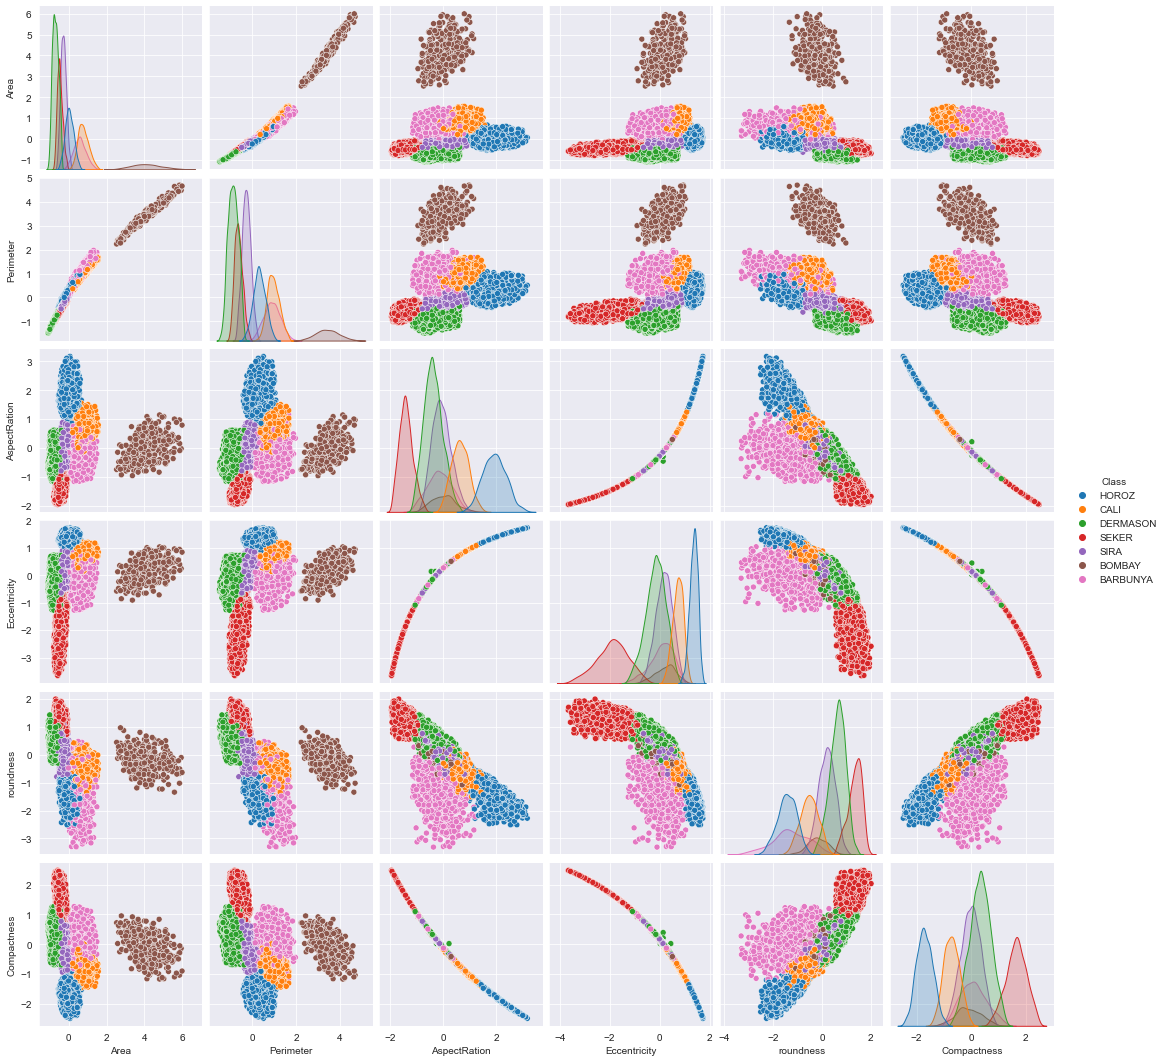

In [31]:
df_6 = df[["Area","Perimeter","AspectRation","Eccentricity", "roundness","Compactness","Class"]]
sns.set_style("darkgrid")
sns.pairplot(df_6, hue="Class")
plt.show()

From the above scatter matrix, we can infer that:
- BOMBAY class is lineary separable from the other classes

- There exists a positive correlation between AspectRation and Eccentricity whereas we see a negative correlation between Eccentricity and Compactness

- The features - Area and Perimeter - show a positive correlation

## K Means Clustering

In [73]:
_df = df.drop("Class",axis=1)
kmeans = KMeans(7)
kmeans.fit(_df)

KMeans(n_clusters=7)

In [74]:
pred_clusters = kmeans.fit_predict(_df)

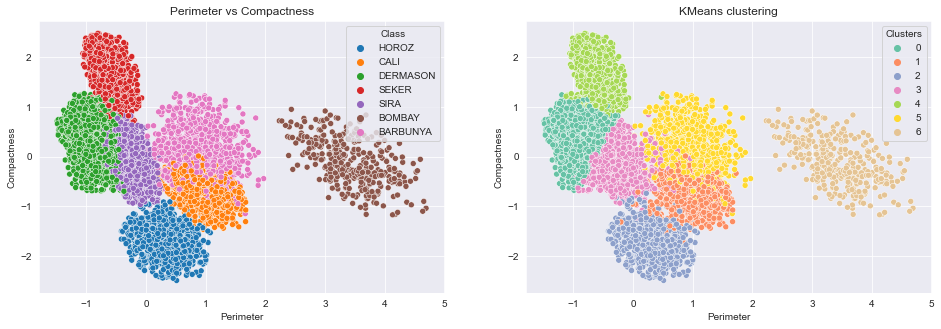

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

plot_df = _df.copy()
plot_df['Clusters'] = pred_clusters

sns.scatterplot(ax=axs[0], x="Perimeter",y="Compactness",data=df, hue="Class")
axs[0].set_title("Perimeter vs Compactness")

sns.scatterplot(ax=axs[1], x="Perimeter",y="Compactness",data=plot_df, hue="Clusters", palette="Set2")
axs[1].set_title("KMeans clustering")

plt.show()

Text(0, 0.5, 'WCSS')

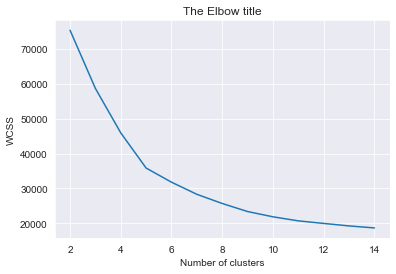

In [77]:
wcss=[]
for i in range(2,15):
    kmeans = KMeans(i)
    kmeans.fit(_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## KMedoids Clustering

In [78]:
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'